In [10]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
import hvplot.pandas
import requests
import json
from config import geoapify_key

In [4]:
college_clean_df = pd.read_csv("../data/college_clean.csv")
college_clean_df.head()

,School Name,Private,Apps,Accept,Tuition/Semester,Personal Spending/Semester,Book Costs/Semester,Room & Board/Semester,Early Career Pay,Mid-Career Pay,% STEM Degrees,% Grad rate,Total Cost/Semester,Acceptance Rate
0,Abilene Christian University,Yes,1660,1232,7440,2200,450,3300,61500.0,110800.0,7,60,13390,0.742169
1,Adelphi University,Yes,2186,1924,12280,1500,750,6450,64500.0,108000.0,8,56,20980,0.880146
2,Adrian College,Yes,1428,1097,11250,1165,400,3750,52400.0,89200.0,11,54,16565,0.768207
3,Agnes Scott College,Yes,417,349,12960,875,450,5450,58300.0,99400.0,20,59,19735,0.836930
4,Alaska Pacific University,Yes,193,146,7560,1500,800,4120,59700.0,102000.0,1,15,13980,0.756477


In [5]:
college_clean_df['Private'].value_counts()

Private
Yes    351
No     102
Name: count, dtype: int64

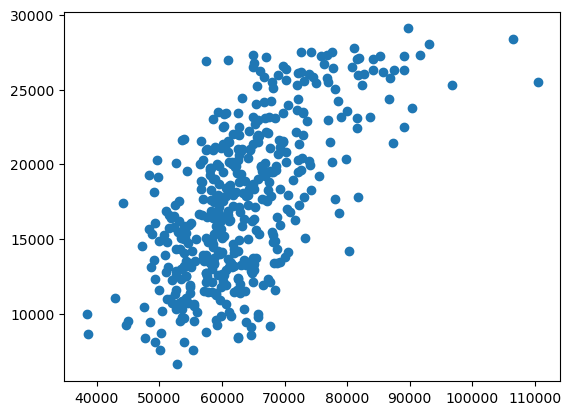

In [6]:
plt.scatter(college_clean_df['Early Career Pay'],college_clean_df['Total Cost/Semester'])

In [7]:
Usd_Data = college_clean_df[college_clean_df['School Name'] == "University of San Diego"]
Usd_Data

,School Name,Private,Apps,Accept,Tuition/Semester,Personal Spending/Semester,Book Costs/Semester,Room & Board/Semester,Early Career Pay,Mid-Career Pay,% STEM Degrees,% Grad rate,Total Cost/Semester,Acceptance Rate
386,University of San Diego,Yes,3934,2735,13600,1820,630,5940,73000.0,139000.0,15,66,21990,0.695221


In [13]:
college_clean_df["Lat"] = ""
college_clean_df["Lon"] = ""
base_url = "https://api.geoapify.com/v1/geocode/search"
params = {"apiKey":geoapify_key,
          "format":"json"}


In [16]:
print("Starting Coordinate Search by College Name")
for index, row in college_clean_df.iterrows():
    school_name = college_clean_df.loc[index, "School Name"]
    params["text"] = f'{school_name}'
    response = requests.get(base_url, params=params)
    response = response.json()
    try:
        college_clean_df.loc[index, "Lat"] = response["results"][0]["lat"]
        college_clean_df.loc[index, "Lon"] = response["results"][0]["lon"]
    except (KeyError, IndexError):
        college_clean_df.loc[index, "Lat"] = "Not Found"
        college_clean_df.loc[index, "Lon"] = "Not Found"

    print(f'Coordinates for {school_name} found...')

college_clean_df.head()

Starting Coordinate Search by College Name
Coordinates for Abilene Christian University found...
Coordinates for Adelphi University found...
Coordinates for Adrian College found...
Coordinates for Agnes Scott College found...
Coordinates for Alaska Pacific University found...
Coordinates for Albertus Magnus College found...
Coordinates for Albion College found...
Coordinates for Albright College found...
Coordinates for Alfred University found...
Coordinates for Allegheny College found...
Coordinates for Alma College found...
Coordinates for Alverno College found...
Coordinates for American International College found...
Coordinates for Amherst College found...
Coordinates for Andrews University found...
Coordinates for Angelo State University found...
Coordinates for Antioch University found...
Coordinates for Appalachian State University found...
Coordinates for Aquinas College found...
Coordinates for Arkansas Tech University found...
Coordinates for Augustana College found...
Coord

,School Name,Private,Apps,Accept,Tuition/Semester,Personal Spending/Semester,Book Costs/Semester,Room & Board/Semester,Early Career Pay,Mid-Career Pay,% STEM Degrees,% Grad rate,Total Cost/Semester,Acceptance Rate,Lat,Lon
0,Abilene Christian University,Yes,1660,1232,7440,2200,450,3300,61500.0,110800.0,7,60,13390,0.742169,32.469973,-99.70736
1,Adelphi University,Yes,2186,1924,12280,1500,750,6450,64500.0,108000.0,8,56,20980,0.880146,40.719764,-73.651972
2,Adrian College,Yes,1428,1097,11250,1165,400,3750,52400.0,89200.0,11,54,16565,0.768207,41.898495,-84.060832
3,Agnes Scott College,Yes,417,349,12960,875,450,5450,58300.0,99400.0,20,59,19735,0.836930,33.768885,-84.294445
4,Alaska Pacific University,Yes,193,146,7560,1500,800,4120,59700.0,102000.0,1,15,13980,0.756477,61.188847,-149.809844


In [36]:
%%capture --no-display
colleges_map = college_clean_df.hvplot.points("Lon",
                                              "Lat",
                                              geo = True,
                                              tiles = 'OSM',
                                              frame_width = 1000,
                                              frame_height = 800,
                                              size = "Early Career Pay",
                                              scale = 0.02,
                                              color = "Private",
                                              hover_cols = ["School Name","Total Cost/Semester","Grad Rate","Mid-Career Pay"])
                                              
colleges_map


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (Private,Early Career Pay,School Name,Total Cost/Semester,Mid-Career Pay)

In [37]:
%%capture --no-display
colleges_map_2 = college_clean_df.hvplot.points("Lon",
                                              "Lat",
                                              geo = True,
                                              tiles = 'OSM',
                                              frame_width = 1000,
                                              frame_height = 800,
                                              size = "Mid-Career Pay",
                                              scale = 0.02,
                                              color = "Private",
                                              hover_cols = ["School Name","Total Cost/Semester","Grad Rate","Early Career Pay"])
                                              
colleges_map_2


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (Private,Mid-Career Pay,School Name,Total Cost/Semester,Early Career Pay)